# Linear model

In [83]:
### Libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import regularizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [222]:
### Read in data
data_linear_true = pd.read_csv('../Data/Simulation/sim_int_truefeatures.csv') 
data_linear_extra = pd.read_csv('../Data/Simulation/sim_int_withextrafeatures.csv')
data_nonlinear_true = pd.read_csv('../Data/Simulation/sim_nonlinear_int_truefeatures.csv')
data_nonlinear_extra = pd.read_csv('../Data/Simulation/sim_nonlinear_int_withextrafeatures.csv')

x_linear_true = np.array(data_linear_true.iloc[:,1:data_linear_true.shape[1]]) #1:12 - true predictors, 13:17 - useless predictors
x_linear_extra = np.array(data_linear_extra.iloc[:,1:data_linear_extra.shape[1]])
y_linear = np.array(data_linear_true.iloc[:,0])

x_nonlinear_true = np.array(data_nonlinear_true.iloc[:,1:data_nonlinear_true.shape[1]])
x_nonlinear_extra = np.array(data_nonlinear_extra.iloc[:,1:data_nonlinear_extra.shape[1]])
y_nonlinear = np.array(data_nonlinear_true.iloc[:,0])

In [10]:
### Define gini coefficient
import keras.backend as K
import tensorflow as tf
def gini(actual, pred):
    pred = tf.argmax(pred, axis=1)
    actual = tf.argmax(actual, axis=1)
    nT = K.shape(pred)[0]
    n = K.cast(nT, dtype='int32')
    n_float = K.cast(nT, dtype=K.floatx())
    actual = K.reshape(actual,(1,n))[-1]
    pred = K.reshape(pred,(1,n))[-1]
    inds = tf.nn.top_k(pred, n)[1]
    a_s = K.gather(actual, inds)
    a_c = K.cumsum(a_s)
    s1 = K.sum(a_c)
    s2 = K.sum(a_s)
    giniSum = K.cast(tf.divide(s1,s2),dtype=K.floatx()) - K.cast(tf.divide(n+1,2),dtype=K.floatx())
    standard_gini = K.cast(tf.divide(giniSum,n_float),dtype=K.floatx())
    return standard_gini

def gini_normalized(a, p):
    norm_gini = K.cast(tf.divide(gini(a, p),gini(a, a)),dtype=K.floatx())
    return norm_gini

In [236]:
## with interaction but no useless predictors
model1 = Sequential()
model1.add(Dense(100, input_dim=np.shape(x_linear_true)[1]-5, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model1.add(Dense(10, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

trace1 = model1.fit(x_linear_true[0:2500,0:12], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_true[2500:3000,0:12], y_linear[2500:3000]))
score1 = model1.evaluate(x_linear_true[2500:3000,0:12], y_linear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 4s 2ms/step - loss: 1.2171 - acc: 0.7336 - gini_normalized: nan - val_loss: 1.0183 - val_acc: 0.8220 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 75us/step - loss: 0.8879 - acc: 0.8376 - gini_normalized: nan - val_loss: 0.7713 - val_acc: 0.8460 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 74us/step - loss: 0.6918 - acc: 0.8508 - gini_normalized: nan - val_loss: 0.6168 - val_acc: 0.8400 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 68us/step - loss: 0.5678 - acc: 0.8556 - gini_normalized: nan - val_loss: 0.5175 - val_acc: 0.8500 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 74us/step - loss: 0.4953 - acc: 0.8588 - gini_normalized: nan - val_loss: 0.4667 - val_acc: 0.8520 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=======

Epoch 45/50
2500/2500 [==============================] - 0s 60us/step - loss: 0.3640 - acc: 0.8596 - gini_normalized: nan - val_loss: 0.3545 - val_acc: 0.8540 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 74us/step - loss: 0.3646 - acc: 0.8572 - gini_normalized: nan - val_loss: 0.3576 - val_acc: 0.8600 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 66us/step - loss: 0.3624 - acc: 0.8560 - gini_normalized: nan - val_loss: 0.3732 - val_acc: 0.8460 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 73us/step - loss: 0.3641 - acc: 0.8540 - gini_normalized: nan - val_loss: 0.3637 - val_acc: 0.8560 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 67us/step - loss: 0.3614 - acc: 0.8564 - gini_normalized: nan - val_loss: 0.3748 - val_acc: 0.8460 - val_gini_normalized: nan
Epoch 50/50
500/500 [==============================] - ETA:  - 0s 54us

In [237]:
score1

[0.36199387168884278, 0.85400000047683711, nan]

In [238]:
## without interaction or useless predictors
model2 = Sequential()
model2.add(Dense(100, input_dim=np.shape(x_linear_true)[1]-10, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model2.add(Dense(10, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

trace2 = model2.fit(x_linear_true[0:2500,0:7], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_true[2500:3000,0:7], y_linear[2500:3000]))
score2 = model2.evaluate(x_linear_true[2500:3000,0:7], y_linear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 3s 1ms/step - loss: 1.1036 - acc: 0.6892 - gini_normalized: nan - val_loss: 0.9686 - val_acc: 0.7380 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 65us/step - loss: 0.8752 - acc: 0.7652 - gini_normalized: nan - val_loss: 0.8066 - val_acc: 0.7120 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 62us/step - loss: 0.7364 - acc: 0.7796 - gini_normalized: nan - val_loss: 0.6910 - val_acc: 0.7720 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 62us/step - loss: 0.6470 - acc: 0.7916 - gini_normalized: nan - val_loss: 0.6181 - val_acc: 0.7960 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 64us/step - loss: 0.5935 - acc: 0.8068 - gini_normalized: nan - val_loss: 0.5798 - val_acc: 0.8100 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=======

Epoch 45/50
2500/2500 [==============================] - 0s 57us/step - loss: 0.4439 - acc: 0.8488 - gini_normalized: nan - val_loss: 0.4774 - val_acc: 0.8140 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 66us/step - loss: 0.4467 - acc: 0.8380 - gini_normalized: nan - val_loss: 0.4432 - val_acc: 0.8420 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 61us/step - loss: 0.4432 - acc: 0.8476 - gini_normalized: nan - val_loss: 0.4518 - val_acc: 0.8320 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 60us/step - loss: 0.4422 - acc: 0.8416 - gini_normalized: nan - val_loss: 0.4544 - val_acc: 0.8180 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 59us/step - loss: 0.4409 - acc: 0.8472 - gini_normalized: nan - val_loss: 0.4396 - val_acc: 0.8340 - val_gini_normalized: nan
Epoch 50/50
500/500 [==============================] - 0s 52us/step


In [239]:
score2

[0.4781001751422882, 0.81399999952316282, nan]

In [292]:
## all original predictors #0:7,12:17
model3 = Sequential()
model3.add(Dense(100, input_dim=12, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model3.add(Dense(10, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

trace3 = model3.fit(np.concatenate((x_linear_true[0:2500,0:7],x_linear_true[0:2500,12:17]), axis=1), y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(np.concatenate((x_linear_true[2500:3000,0:7],x_linear_true[2500:3000,12:17]), axis=1), y_linear[2500:3000]))
score3 = model3.evaluate(x_linear_true[2500:3000,:], y_linear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 7s 3ms/step - loss: 1.2442 - acc: 0.6912 - gini_normalized: nan - val_loss: 1.0701 - val_acc: 0.7220 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 88us/step - loss: 0.9566 - acc: 0.7544 - gini_normalized: nan - val_loss: 0.8552 - val_acc: 0.7460 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 80us/step - loss: 0.7788 - acc: 0.7672 - gini_normalized: nan - val_loss: 0.7156 - val_acc: 0.7600 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 74us/step - loss: 0.6715 - acc: 0.7804 - gini_normalized: nan - val_loss: 0.6379 - val_acc: 0.7820 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 80us/step - loss: 0.6122 - acc: 0.7936 - gini_normalized: nan - val_loss: 0.5938 - val_acc: 0.8020 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=======

Epoch 45/50
2500/2500 [==============================] - 0s 72us/step - loss: 0.4424 - acc: 0.8500 - gini_normalized: nan - val_loss: 0.4721 - val_acc: 0.8160 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 74us/step - loss: 0.4417 - acc: 0.8436 - gini_normalized: nan - val_loss: 0.4773 - val_acc: 0.8040 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 70us/step - loss: 0.4409 - acc: 0.8508 - gini_normalized: nan - val_loss: 0.4497 - val_acc: 0.8300 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 74us/step - loss: 0.4383 - acc: 0.8512 - gini_normalized: nan - val_loss: 0.4431 - val_acc: 0.8380 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 84us/step - loss: 0.4394 - acc: 0.8440 - gini_normalized: nan - val_loss: 0.4422 - val_acc: 0.8420 - val_gini_normalized: nan
Epoch 50/50
2500/2500 [==============================] - 0s 75us/step 

ValueError: Error when checking input: expected dense_308_input to have shape (None, 12) but got array with shape (500, 17)

In [293]:
score3

[0.36987637090682984, 0.86000000238418584, nan]

In [249]:
## with interaction and useless features & original useless predictors
model4 = Sequential()
model4.add(Dense(100, input_dim=np.shape(x_linear_extra)[1], kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model4.add(Dense(10, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

trace4 = model4.fit(x_linear_extra[0:2500,:], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_extra[2500:3000,:], y_linear[2500:3000]))
score4 = model4.evaluate(x_linear_extra[2500:3000,:], y_linear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 4s 1ms/step - loss: 2.0072 - acc: 0.7484 - gini_normalized: nan - val_loss: 1.7020 - val_acc: 0.7880 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 69us/step - loss: 1.4856 - acc: 0.8044 - gini_normalized: nan - val_loss: 1.3306 - val_acc: 0.8120 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 65us/step - loss: 1.1784 - acc: 0.8192 - gini_normalized: nan - val_loss: 1.1502 - val_acc: 0.8060 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 67us/step - loss: 0.9969 - acc: 0.8332 - gini_normalized: nan - val_loss: 0.9420 - val_acc: 0.8360 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 88us/step - loss: 0.8723 - acc: 0.8336 - gini_normalized: nan - val_loss: 0.8743 - val_acc: 0.8340 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=======

2500/2500 [==============================] - 0s 64us/step - loss: 0.4413 - acc: 0.8532 - gini_normalized: nan - val_loss: 0.4467 - val_acc: 0.8480 - val_gini_normalized: nan
Epoch 45/50
2500/2500 [==============================] - 0s 62us/step - loss: 0.4254 - acc: 0.8532 - gini_normalized: nan - val_loss: 0.4433 - val_acc: 0.8480 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 53us/step - loss: 0.4217 - acc: 0.8592 - gini_normalized: nan - val_loss: 0.4305 - val_acc: 0.8480 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 76us/step - loss: 0.4361 - acc: 0.8584 - gini_normalized: nan - val_loss: 0.4536 - val_acc: 0.8280 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 57us/step - loss: 0.4174 - acc: 0.8624 - gini_normalized: nan - val_loss: 0.5426 - val_acc: 0.8260 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 76us/step - loss: 0.42

In [250]:
score4

[0.46030194759368898, 0.82999999952316283, nan]

.

C:\Users\Irina\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 8 iterations, alpha=2.171e-01, previous alpha=1.991e-01, with an active set of 9 regressors.
  ConvergenceWarning)


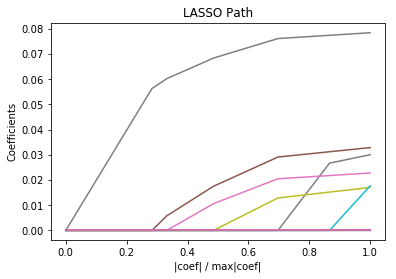

|coef| / max|coef| 0.669633684936
Nonzero features: 5
Nonzero columns: 
[25 26 27 28 31]


,25,26,27,28,31
0,1.707692,0.361229,5.692984,1.335716,-0.525556
1,1.962434,2.631511,6.007690,0.958707,0.696791
2,0.442242,0.216815,1.691355,2.163867,0.533716
3,3.235778,0.348115,2.392982,0.678406,-1.112818
4,1.180373,1.522978,1.192875,0.193737,0.394207


In [244]:
# Feature selection
from sklearn import linear_model
alphas, _, coefs = linear_model.lars_path(x_linear_extra[0:2500,:], y_linear[0:2500], method='lasso', verbose=True)

# Plot results
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
#plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

# Top 5 variables
i = 5
print('|coef| / max|coef|',xx[i])
print('Nonzero features:',sum(abs(coefs.T[i])>0))
print("Nonzero columns: ")
print(pd.DataFrame(x_linear_extra[0:2500,:]).iloc[:,abs(coefs.T[i])>0].columns.values)
pd.DataFrame(x_linear_extra[0:2500,:]).iloc[:,abs(coefs.T[i])>0].head()

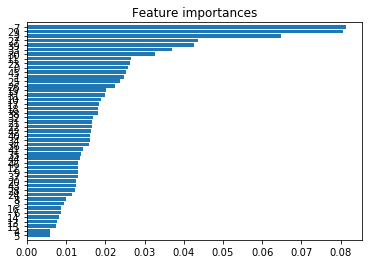

 1) 7                              0.081353
 2) 29                             0.080754
 3) 2                              0.064868
 4) 27                             0.043589
 5) 39                             0.042504
 6) 33                             0.036890
 7) 30                             0.032569
 8) 11                             0.026663
 9) 23                             0.026372
10) 0                              0.025795
11) 45                             0.025165
12) 1                              0.024811
13) 25                             0.023745
14) 26                             0.022431
15) 19                             0.020065
16) 31                             0.019842
17) 10                             0.018910
18) 17                             0.018439
19) 18                             0.018234
20) 38                             0.018050
21) 32                             0.016921
22) 21                             0.016702
23) 22                          

In [245]:
### Random forest feature importance
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(x_linear_extra[0:2500,:], y_linear[0:2500])

### Plot feature importance
# https://stackoverflow.com/questions/44511636/matplotlib-plot-feature-importance-with-feature-names
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(x_linear_extra[0:2500,:].shape[1]), importances[indices])#,
       #color="r")#, xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(x_linear_extra[0:2500,:].shape[1]), indices)
plt.ylim([-1, x_linear_extra[0:2500,:].shape[1]])
plt.show()

# Selected features
feat_labels = pd.DataFrame(x_linear_extra[0:2500,:]).columns
indices = np.argsort(forest.feature_importances_)[::-1]

for f in range(pd.DataFrame(x_linear_extra[0:2500,:]).shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

In [246]:
# Selecting features based on how precipitously variable coefficients fall to zero in lasso/at jump in variable importance:
selected_features = sorted(list(set(pd.DataFrame(x_linear_extra[0:2500,:]).iloc[:,abs(coefs.T[i])>0].columns.values.tolist()+ \
                                    indices[0:14].tolist())))
print(selected_features)

[0, 1, 2, 7, 11, 23, 25, 26, 27, 28, 29, 30, 31, 33, 39, 45]


In [248]:
## Feature selection then NN
model5 = Sequential()
model5.add(Dense(100, input_dim=len(selected_features), kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model5.add(Dense(10, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model5.add(Dense(1, activation='sigmoid'))

model5.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

trace5 = model5.fit(x_linear_extra[0:2500,selected_features], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_extra[2500:3000,selected_features], y_linear[2500:3000]))
score5 = model5.evaluate(x_linear_extra[2500:3000,selected_features], y_linear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 4s 2ms/step - loss: 1.3558 - acc: 0.7744 - gini_normalized: nan - val_loss: 1.1586 - val_acc: 0.8200 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 66us/step - loss: 1.0658 - acc: 0.8308 - gini_normalized: nan - val_loss: 0.9883 - val_acc: 0.8360 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 78us/step - loss: 0.9137 - acc: 0.8336 - gini_normalized: nan - val_loss: 0.8676 - val_acc: 0.8280 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 76us/step - loss: 0.7933 - acc: 0.8404 - gini_normalized: nan - val_loss: 0.7733 - val_acc: 0.8260 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 64us/step - loss: 0.7156 - acc: 0.8368 - gini_normalized: nan - val_loss: 0.6671 - val_acc: 0.8400 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=======

Epoch 45/50
2500/2500 [==============================] - 0s 60us/step - loss: 0.4239 - acc: 0.8440 - gini_normalized: nan - val_loss: 0.4200 - val_acc: 0.8320 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 65us/step - loss: 0.4247 - acc: 0.8492 - gini_normalized: nan - val_loss: 0.4205 - val_acc: 0.8440 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 67us/step - loss: 0.4417 - acc: 0.8424 - gini_normalized: nan - val_loss: 0.4216 - val_acc: 0.8340 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 71us/step - loss: 0.4269 - acc: 0.8440 - gini_normalized: nan - val_loss: 0.4412 - val_acc: 0.8340 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 86us/step - loss: 0.4274 - acc: 0.8432 - gini_normalized: nan - val_loss: 0.4856 - val_acc: 0.8220 - val_gini_normalized: nan
Epoch 50/50
500/500 [==============================] - 0s 40us/step


In [251]:
score5

[0.40688827180862425, 0.84999999761581424, nan]

Validation accuracy


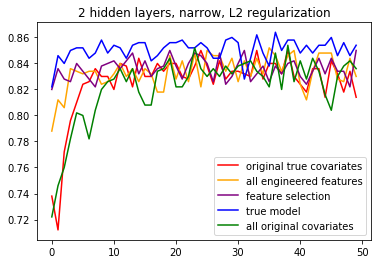

In [295]:
print('Validation accuracy')
plt.title('2 hidden layers, narrow, L2 regularization')
plt.plot(trace2.history['val_acc'],label='original true covariates', color="red")
plt.plot(trace4.history['val_acc'],label='all engineered features', color="orange")
plt.plot(trace5.history['val_acc'],label='feature selection', color="purple")
plt.plot(trace1.history['val_acc'],label='true model', color="blue")
plt.plot(trace3.history['val_acc'],label='all original covariates', color="green")
plt.legend(loc=4)
plt.show()

Adding engineered features improves performance in the first few iterations, and correctly identifying the true interaction terms is able to achieve better long-run performance. However, including unnecessary engineered features results in similar performance in the long run as not performing any feature engineering. Optimal accuracy is achieved when only the true interactions are included, reflecting that one should only perform feature engineering in the presence of subject expertise.

In [265]:
## with interaction and true covariates
model_narrow1 = Sequential()
model_narrow1.add(Dense(20, input_dim=np.shape(x_linear_true)[1]-5, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_narrow1.add(Dense(1, activation='sigmoid'))
model_narrow1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

trace_narrow1 = model_narrow1.fit(x_linear_true[0:2500,0:12], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_true[2500:3000,0:12], y_linear[2500:3000]))
score_narrow1 = model_narrow1.evaluate(x_linear_true[2500:3000,0:12], y_linear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.8840 - acc: 0.6756 - gini_normalized: nan - val_loss: 0.8096 - val_acc: 0.7100 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 62us/step - loss: 0.7627 - acc: 0.7444 - gini_normalized: nan - val_loss: 0.7054 - val_acc: 0.7780 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 71us/step - loss: 0.6714 - acc: 0.7936 - gini_normalized: nan - val_loss: 0.6235 - val_acc: 0.8140 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 70us/step - loss: 0.5983 - acc: 0.8228 - gini_normalized: nan - val_loss: 0.5573 - val_acc: 0.8380 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 70us/step - loss: 0.5405 - acc: 0.8364 - gini_normalized: nan - val_loss: 0.5061 - val_acc: 0.8400 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=======

Epoch 45/50
2500/2500 [==============================] - 0s 65us/step - loss: 0.3333 - acc: 0.8620 - gini_normalized: nan - val_loss: 0.3264 - val_acc: 0.8540 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 71us/step - loss: 0.3326 - acc: 0.8600 - gini_normalized: nan - val_loss: 0.3254 - val_acc: 0.8560 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 68us/step - loss: 0.3326 - acc: 0.8616 - gini_normalized: nan - val_loss: 0.3257 - val_acc: 0.8540 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 70us/step - loss: 0.3318 - acc: 0.8624 - gini_normalized: nan - val_loss: 0.3272 - val_acc: 0.8440 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 69us/step - loss: 0.3325 - acc: 0.8584 - gini_normalized: nan - val_loss: 0.3244 - val_acc: 0.8560 - val_gini_normalized: nan
Epoch 50/50
500/500 [==============================] - 0s 68us/step


In [266]:
## without interactions
model_narrow2 = Sequential()
model_narrow2.add(Dense(20, input_dim=np.shape(x_linear_true)[1]-10, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_narrow2.add(Dense(1, activation='sigmoid'))
model_narrow2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

trace_narrow2 = model_narrow2.fit(x_linear_true[0:2500,0:7], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_true[2500:3000,0:7], y_linear[2500:3000]))
score_narrow2 = model_narrow2.evaluate(x_linear_true[2500:3000,0:7], y_linear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.8799 - acc: 0.4800 - gini_normalized: nan - val_loss: 0.8187 - val_acc: 0.5780 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 63us/step - loss: 0.7804 - acc: 0.6592 - gini_normalized: nan - val_loss: 0.7404 - val_acc: 0.7280 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 64us/step - loss: 0.7118 - acc: 0.7264 - gini_normalized: nan - val_loss: 0.6849 - val_acc: 0.7340 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 65us/step - loss: 0.6611 - acc: 0.7452 - gini_normalized: nan - val_loss: 0.6413 - val_acc: 0.7500 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 72us/step - loss: 0.6244 - acc: 0.7532 - gini_normalized: nan - val_loss: 0.6113 - val_acc: 0.7580 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=======

Epoch 45/50
2500/2500 [==============================] - 0s 90us/step - loss: 0.4158 - acc: 0.8428 - gini_normalized: nan - val_loss: 0.4129 - val_acc: 0.8400 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 69us/step - loss: 0.4148 - acc: 0.8416 - gini_normalized: nan - val_loss: 0.4121 - val_acc: 0.8440 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 79us/step - loss: 0.4144 - acc: 0.8484 - gini_normalized: nan - val_loss: 0.4101 - val_acc: 0.8340 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 99us/step - loss: 0.4134 - acc: 0.8440 - gini_normalized: nan - val_loss: 0.4097 - val_acc: 0.8320 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 138us/step - loss: 0.4120 - acc: 0.8432 - gini_normalized: nan - val_loss: 0.4097 - val_acc: 0.8380 - val_gini_normalized: nan
Epoch 50/50
500/500 [==============================] - 0s 68us/step


In [301]:
## with interaction and useless predictors
model_narrow3 = Sequential()
model_narrow3.add(Dense(20, input_dim=12, activation='relu'))
model_narrow3.add(Dense(1, activation='sigmoid'))

model_narrow3.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

trace_narrow3 = model_narrow3.fit(np.concatenate((x_linear_true[0:2500,0:7],x_linear_true[0:2500,12:17]),axis=1), y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(np.concatenate((x_linear_true[2500:3000,0:7],x_linear_true[2500:3000,12:17]),axis=1), y_linear[2500:3000]))
score_narrow3 = model_narrow3.evaluate(np.concatenate((x_linear_true[2500:3000,0:7],x_linear_true[2500:3000,12:17]),axis=1), y_linear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7335 - acc: 0.5676 - gini_normalized: nan - val_loss: 0.6924 - val_acc: 0.5940 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 78us/step - loss: 0.6683 - acc: 0.6072 - gini_normalized: nan - val_loss: 0.6399 - val_acc: 0.6280 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 71us/step - loss: 0.6213 - acc: 0.6592 - gini_normalized: nan - val_loss: 0.6014 - val_acc: 0.6740 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 66us/step - loss: 0.5880 - acc: 0.7076 - gini_normalized: nan - val_loss: 0.5747 - val_acc: 0.7100 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 64us/step - loss: 0.5602 - acc: 0.7464 - gini_normalized: nan - val_loss: 0.5483 - val_acc: 0.7280 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=======

Epoch 45/50
2500/2500 [==============================] - 0s 64us/step - loss: 0.3283 - acc: 0.8540 - gini_normalized: nan - val_loss: 0.3220 - val_acc: 0.8700 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 70us/step - loss: 0.3277 - acc: 0.8556 - gini_normalized: nan - val_loss: 0.3223 - val_acc: 0.8680 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 69us/step - loss: 0.3269 - acc: 0.8560 - gini_normalized: nan - val_loss: 0.3216 - val_acc: 0.8660 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 67us/step - loss: 0.3261 - acc: 0.8564 - gini_normalized: nan - val_loss: 0.3208 - val_acc: 0.8640 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 67us/step - loss: 0.3252 - acc: 0.8560 - gini_normalized: nan - val_loss: 0.3205 - val_acc: 0.8620 - val_gini_normalized: nan
Epoch 50/50
500/500 [==============================] - 0s 40us/step


In [268]:
## with interaction and useless features & original useless predictors
model_narrow4 = Sequential()
model_narrow4.add(Dense(20, input_dim=np.shape(x_linear_extra)[1], kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_narrow4.add(Dense(1, activation='sigmoid'))

model_narrow4.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

trace_narrow4 = model_narrow4.fit(x_linear_extra[0:2500,:], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_extra[2500:3000,:], y_linear[2500:3000]))
score_narrow4 = model_narrow4.evaluate(x_linear_extra[2500:3000,:], y_linear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 6s 3ms/step - loss: 1.3553 - acc: 0.6032 - gini_normalized: nan - val_loss: 1.1376 - val_acc: 0.6480 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 50us/step - loss: 1.0317 - acc: 0.7372 - gini_normalized: nan - val_loss: 0.9562 - val_acc: 0.7260 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 46us/step - loss: 0.8720 - acc: 0.7672 - gini_normalized: nan - val_loss: 0.8195 - val_acc: 0.7780 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 46us/step - loss: 0.7683 - acc: 0.7920 - gini_normalized: nan - val_loss: 0.7336 - val_acc: 0.7860 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 50us/step - loss: 0.6945 - acc: 0.8096 - gini_normalized: nan - val_loss: 0.6745 - val_acc: 0.8020 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=======

Epoch 45/50
2500/2500 [==============================] - 0s 46us/step - loss: 0.3970 - acc: 0.8552 - gini_normalized: nan - val_loss: 0.4278 - val_acc: 0.8360 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 45us/step - loss: 0.4097 - acc: 0.8524 - gini_normalized: nan - val_loss: 0.4197 - val_acc: 0.8400 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 47us/step - loss: 0.3983 - acc: 0.8544 - gini_normalized: nan - val_loss: 0.4277 - val_acc: 0.8360 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 46us/step - loss: 0.3968 - acc: 0.8584 - gini_normalized: nan - val_loss: 0.4198 - val_acc: 0.8440 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 47us/step - loss: 0.4044 - acc: 0.8552 - gini_normalized: nan - val_loss: 0.4202 - val_acc: 0.8340 - val_gini_normalized: nan
Epoch 50/50
500/500 [==============================] - 0s 36us/step


In [269]:
## Feature selection then NN
model_narrow5 = Sequential()
model_narrow5.add(Dense(20, input_dim=len(selected_features), kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_narrow5.add(Dense(1, activation='sigmoid'))

model_narrow5.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

trace_narrow5 = model_narrow5.fit(x_linear_extra[0:2500,selected_features], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_extra[2500:3000,selected_features], y_linear[2500:3000]))
score_narrow5 = model_narrow5.evaluate(x_linear_extra[2500:3000,selected_features], y_linear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 5s 2ms/step - loss: 1.5303 - acc: 0.3604 - gini_normalized: nan - val_loss: 1.1199 - val_acc: 0.5200 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 39us/step - loss: 1.0233 - acc: 0.6212 - gini_normalized: nan - val_loss: 0.8667 - val_acc: 0.7120 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 40us/step - loss: 0.8180 - acc: 0.7432 - gini_normalized: nan - val_loss: 0.7636 - val_acc: 0.7620 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 40us/step - loss: 0.7172 - acc: 0.7864 - gini_normalized: nan - val_loss: 0.6951 - val_acc: 0.8040 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 42us/step - loss: 0.6518 - acc: 0.8168 - gini_normalized: nan - val_loss: 0.6310 - val_acc: 0.8220 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=======

Epoch 45/50
2500/2500 [==============================] - 0s 43us/step - loss: 0.3870 - acc: 0.8436 - gini_normalized: nan - val_loss: 0.3978 - val_acc: 0.8280 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 66us/step - loss: 0.3896 - acc: 0.8496 - gini_normalized: nan - val_loss: 0.3898 - val_acc: 0.8420 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 44us/step - loss: 0.3798 - acc: 0.8464 - gini_normalized: nan - val_loss: 0.3790 - val_acc: 0.8300 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 40us/step - loss: 0.3918 - acc: 0.8476 - gini_normalized: nan - val_loss: 0.3916 - val_acc: 0.8360 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 46us/step - loss: 0.3808 - acc: 0.8472 - gini_normalized: nan - val_loss: 0.3814 - val_acc: 0.8280 - val_gini_normalized: nan
Epoch 50/50
500/500 [==============================] - 0s 30us/step


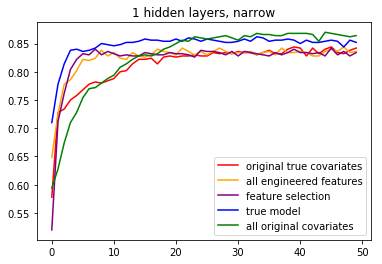

In [303]:
plt.title('1 hidden layers, narrow')
plt.plot(trace_narrow2.history['val_acc'],label='original true covariates', color="red")
plt.plot(trace_narrow4.history['val_acc'],label='all engineered features', color="orange")
plt.plot(trace_narrow5.history['val_acc'],label='feature selection', color="purple")
plt.plot(trace_narrow1.history['val_acc'],label='true model', color="blue")
plt.plot(trace_narrow3.history['val_acc'],label='all original covariates', color="green")
plt.legend(loc=4)
plt.show()

With less model complexity, it takes longer learn a model without engineered features. 

In [174]:
## with interaction but no useless predictors
model_wide1 = Sequential()
model_wide1.add(Dense(100, input_dim=np.shape(x_linear_true)[1]-5, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_wide1.add(Dense(1, activation='sigmoid'))
model_wide1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_wide1 = model_wide1.fit(x_linear_true[0:2500,0:12], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_true[2500:3000,0:12], y_linear[2500:3000]))
score_wide1 = model_wide1.evaluate(x_linear_true[2500:3000,0:12], y_linear[2500:3000], batch_size=64)

model_wide2 = Sequential()
model_wide2.add(Dense(100, input_dim=np.shape(x_linear_true)[1]-10, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_wide2.add(Dense(1, activation='sigmoid'))
model_wide2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_wide2 = model_wide2.fit(x_linear_true[0:2500,0:7], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_true[2500:3000,0:7], y_linear[2500:3000]))
score_wide2 = model_wide2.evaluate(x_linear_true[2500:3000,0:7], y_linear[2500:3000], batch_size=64)

model_wide3 = Sequential()
model_wide3.add(Dense(100, input_dim=np.shape(x_linear_true)[1], kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_wide3.add(Dense(1, activation='sigmoid'))
model_wide3.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_wide3 = model_wide3.fit(x_linear_true[0:2500,:], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_true[2500:3000,:], y_linear[2500:3000]))
score_wide3 = model_wide3.evaluate(x_linear_true[2500:3000,:], y_linear[2500:3000], batch_size=64)

model_wide4 = Sequential()
model_wide4.add(Dense(100, input_dim=np.shape(x_linear_extra)[1], kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_wide4.add(Dense(1, activation='sigmoid'))
model_wide4.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_wide4 = model_wide4.fit(x_linear_extra[0:2500,:], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_extra[2500:3000,:], y_linear[2500:3000]))
score_wide4 = model_wide4.evaluate(x_linear_extra[2500:3000,:], y_linear[2500:3000], batch_size=64)

model_wide5 = Sequential()
model_wide5.add(Dense(100, input_dim=len(selected_features), kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_wide5.add(Dense(1, activation='sigmoid'))
model_wide5.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_wide5 = model_wide5.fit(x_linear_extra[0:2500,selected_features], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_extra[2500:3000,selected_features], y_linear[2500:3000]))
score_wide5 = model_wide5.evaluate(x_linear_extra[2500:3000,selected_features], y_linear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 2s 815us/step - loss: 0.8924 - acc: 0.8004 - gini_normalized: nan - val_loss: 0.7609 - val_acc: 0.8420 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 51us/step - loss: 0.6747 - acc: 0.8460 - gini_normalized: nan - val_loss: 0.5980 - val_acc: 0.8420 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 51us/step - loss: 0.5471 - acc: 0.8496 - gini_normalized: nan - val_loss: 0.4987 - val_acc: 0.8460 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 53us/step - loss: 0.4694 - acc: 0.8548 - gini_normalized: nan - val_loss: 0.4360 - val_acc: 0.8520 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 52us/step - loss: 0.4229 - acc: 0.8524 - gini_normalized: nan - val_loss: 0.4006 - val_acc: 0.8500 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=====

Epoch 45/50
2500/2500 [==============================] - 0s 45us/step - loss: 0.3267 - acc: 0.8600 - gini_normalized: nan - val_loss: 0.3192 - val_acc: 0.8560 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 52us/step - loss: 0.3272 - acc: 0.8588 - gini_normalized: nan - val_loss: 0.3204 - val_acc: 0.8520 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 46us/step - loss: 0.3262 - acc: 0.8580 - gini_normalized: nan - val_loss: 0.3155 - val_acc: 0.8480 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 46us/step - loss: 0.3263 - acc: 0.8588 - gini_normalized: nan - val_loss: 0.3189 - val_acc: 0.8620 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 51us/step - loss: 0.3266 - acc: 0.8604 - gini_normalized: nan - val_loss: 0.3182 - val_acc: 0.8580 - val_gini_normalized: nan
Epoch 50/50
500/500 [==============================] - 0s 30us/step
Tr

2500/2500 [==============================] - 0s 42us/step - loss: 0.3935 - acc: 0.8444 - gini_normalized: nan - val_loss: 0.3916 - val_acc: 0.8340 - val_gini_normalized: nan
Epoch 39/50
2500/2500 [==============================] - 0s 46us/step - loss: 0.3929 - acc: 0.8468 - gini_normalized: nan - val_loss: 0.3882 - val_acc: 0.8520 - val_gini_normalized: nan
Epoch 40/50
2500/2500 [==============================] - 0s 44us/step - loss: 0.3915 - acc: 0.8484 - gini_normalized: nan - val_loss: 0.3921 - val_acc: 0.8380 - val_gini_normalized: nan
Epoch 41/50
2500/2500 [==============================] - 0s 44us/step - loss: 0.3910 - acc: 0.8468 - gini_normalized: nan - val_loss: 0.3854 - val_acc: 0.8460 - val_gini_normalized: nan
Epoch 42/50
2500/2500 [==============================] - 0s 46us/step - loss: 0.3893 - acc: 0.8488 - gini_normalized: nan - val_loss: 0.3887 - val_acc: 0.8400 - val_gini_normalized: nan
Epoch 43/50
2500/2500 [==============================] - 0s 45us/step - loss: 0.38

2500/2500 [==============================] - 0s 46us/step - loss: 0.3302 - acc: 0.8624 - gini_normalized: nan - val_loss: 0.3213 - val_acc: 0.8560 - val_gini_normalized: nan
Epoch 32/50
2500/2500 [==============================] - 0s 47us/step - loss: 0.3318 - acc: 0.8588 - gini_normalized: nan - val_loss: 0.3265 - val_acc: 0.8500 - val_gini_normalized: nan
Epoch 33/50
2500/2500 [==============================] - 0s 49us/step - loss: 0.3319 - acc: 0.8620 - gini_normalized: nan - val_loss: 0.3268 - val_acc: 0.8520 - val_gini_normalized: nan
Epoch 34/50
2500/2500 [==============================] - 0s 48us/step - loss: 0.3305 - acc: 0.8564 - gini_normalized: nan - val_loss: 0.3244 - val_acc: 0.8500 - val_gini_normalized: nan
Epoch 35/50
2500/2500 [==============================] - 0s 45us/step - loss: 0.3315 - acc: 0.8596 - gini_normalized: nan - val_loss: 0.3181 - val_acc: 0.8460 - val_gini_normalized: nan
Epoch 36/50
2500/2500 [==============================] - 0s 50us/step - loss: 0.32

2500/2500 [==============================] - 0s 48us/step - loss: 0.4239 - acc: 0.8540 - gini_normalized: nan - val_loss: 0.4484 - val_acc: 0.8360 - val_gini_normalized: nan
Epoch 25/50
2500/2500 [==============================] - 0s 52us/step - loss: 0.4289 - acc: 0.8540 - gini_normalized: nan - val_loss: 0.4660 - val_acc: 0.8340 - val_gini_normalized: nan
Epoch 26/50
2500/2500 [==============================] - 0s 53us/step - loss: 0.4222 - acc: 0.8536 - gini_normalized: nan - val_loss: 0.4831 - val_acc: 0.8280 - val_gini_normalized: nan
Epoch 27/50
2500/2500 [==============================] - 0s 54us/step - loss: 0.4150 - acc: 0.8580 - gini_normalized: nan - val_loss: 0.4350 - val_acc: 0.8380 - val_gini_normalized: nan
Epoch 28/50
2500/2500 [==============================] - 0s 53us/step - loss: 0.4192 - acc: 0.8548 - gini_normalized: nan - val_loss: 0.4405 - val_acc: 0.8340 - val_gini_normalized: nan
Epoch 29/50
2500/2500 [==============================] - 0s 53us/step - loss: 0.41

2500/2500 [==============================] - 0s 48us/step - loss: 0.4099 - acc: 0.8456 - gini_normalized: nan - val_loss: 0.3983 - val_acc: 0.8400 - val_gini_normalized: nan
Epoch 18/50
2500/2500 [==============================] - 0s 48us/step - loss: 0.4080 - acc: 0.8460 - gini_normalized: nan - val_loss: 0.3934 - val_acc: 0.8420 - val_gini_normalized: nan
Epoch 19/50
2500/2500 [==============================] - 0s 51us/step - loss: 0.4084 - acc: 0.8432 - gini_normalized: nan - val_loss: 0.4020 - val_acc: 0.8380 - val_gini_normalized: nan
Epoch 20/50
2500/2500 [==============================] - 0s 47us/step - loss: 0.4006 - acc: 0.8484 - gini_normalized: nan - val_loss: 0.4242 - val_acc: 0.8260 - val_gini_normalized: nan
Epoch 21/50
2500/2500 [==============================] - 0s 52us/step - loss: 0.3989 - acc: 0.8468 - gini_normalized: nan - val_loss: 0.4278 - val_acc: 0.8380 - val_gini_normalized: nan
Epoch 22/50
2500/2500 [==============================] - 0s 49us/step - loss: 0.39

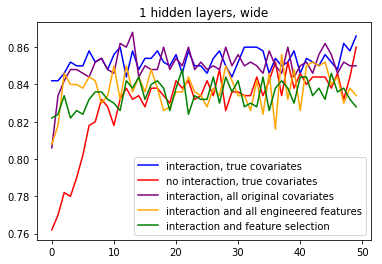

In [175]:
plt.title('1 hidden layers, wide')
plt.plot(trace_wide1.history['val_acc'],label='interaction, true covariates', color="blue")
plt.plot(trace_wide2.history['val_acc'],label='no interaction, true covariates', color="red")
plt.plot(trace_wide3.history['val_acc'],label='interaction, all original covariates', color="purple")
plt.plot(trace_wide4.history['val_acc'],label='interaction and all engineered features', color="orange")
plt.plot(trace_wide5.history['val_acc'],label='interaction and feature selection', color="green")
plt.legend(loc=4)
plt.show()

With a single wide layer, including all engineered features performs similarly to feature selection. In the long run, including only the original covariates continues to outperform feature engineering. Including only the original covariates can achieve the same accuracy, but only after many iterations.

# Non-linear model

.

C:\Users\Irina\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 13 iterations, alpha=8.709e-02, previous alpha=7.973e-02, with an active set of 14 regressors.
  ConvergenceWarning)


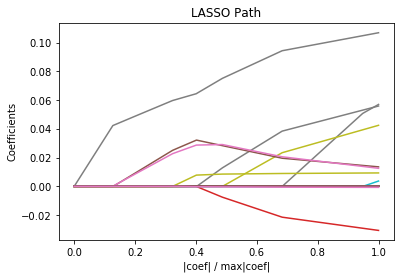

|coef| / max|coef| 0.486945293468
Nonzero features: 10
Nonzero columns: 
[17 23 25 26 27 28 31 40 43 46]


,17,23,25,26,27,28,31,40,43,46
0,0.286378,5.261075,1.707692,0.361229,5.692984,1.335716,-0.525556,-0.585454,-3.517641,6.008395
1,0.454526,5.764614,1.962434,2.631511,6.007690,0.958707,0.696791,0.539619,-22.944638,-42.520083
2,0.665689,0.145142,0.442242,0.216815,1.691355,2.163867,0.533716,-2.908897,-1.980462,0.680829
3,1.378909,0.664288,3.235778,0.348115,2.392982,0.678406,-1.112818,-1.209367,2.719582,-2.248765
4,0.027500,0.005486,1.180373,1.522978,1.192875,0.193737,0.394207,2.385188,-0.256309,-0.107459


In [176]:
# Feature selection
from sklearn import linear_model
alphas_nl, _, coefs_nl = linear_model.lars_path(x_nonlinear_extra[0:2500,:], y_nonlinear[0:2500], method='lasso', verbose=True)

# Plot results
xx_nl = np.sum(np.abs(coefs_nl.T), axis=1)
xx_nl /= xx_nl[-1]

plt.plot(xx_nl, coefs_nl.T)
ymin, ymax = plt.ylim()
#plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

# Top 10 variables
i = 10
print('|coef| / max|coef|',xx_nl[i])
print('Nonzero features:',sum(abs(coefs_nl.T[i])>0))
print("Nonzero columns: ")
print(pd.DataFrame(x_nonlinear_extra[0:2500,:]).iloc[:,abs(coefs_nl.T[i])>0].columns.values)
pd.DataFrame(x_nonlinear_extra[0:2500,:]).iloc[:,abs(coefs_nl.T[i])>0].head()

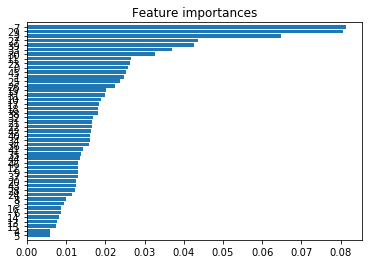

 1) 7                              0.081353
 2) 29                             0.080754
 3) 2                              0.064868
 4) 27                             0.043589
 5) 39                             0.042504
 6) 33                             0.036890
 7) 30                             0.032569
 8) 11                             0.026663
 9) 23                             0.026372
10) 0                              0.025795
11) 45                             0.025165
12) 1                              0.024811
13) 25                             0.023745
14) 26                             0.022431
15) 19                             0.020065
16) 31                             0.019842
17) 10                             0.018910
18) 17                             0.018439
19) 18                             0.018234
20) 38                             0.018050
21) 32                             0.016921
22) 21                             0.016702
23) 22                          

In [177]:
### Random forest feature importance
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(x_linear_extra[0:2500,:], y_linear[0:2500])

### Plot feature importance
# https://stackoverflow.com/questions/44511636/matplotlib-plot-feature-importance-with-feature-names
importances_nl = forest.feature_importances_
std_nl = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices_nl = np.argsort(importances_nl)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(x_linear_extra[0:2500,:].shape[1]), importances_nl[indices_nl])#,
       #color="r")#, xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(x_linear_extra[0:2500,:].shape[1]), indices_nl)
plt.ylim([-1, x_linear_extra[0:2500,:].shape[1]])
plt.show()

# Selected features
feat_labels_nl = pd.DataFrame(x_linear_extra[0:2500,:]).columns
indices_nl = np.argsort(forest.feature_importances_)[::-1]

for f in range(pd.DataFrame(x_linear_extra[0:2500,:]).shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels_nl[indices_nl[f]], importances_nl[indices_nl[f]]))

In [179]:
# Selecting features based on how precipitously variable coefficients fall to zero in lasso/at jump in variable importance:
selected_features_nl = sorted(list(set(pd.DataFrame(x_linear_extra[0:2500,:]).iloc[:,abs(coefs_nl.T[i])>0].columns.values.tolist()+ \
                                    indices_nl[0:8].tolist())))
print(selected_features_nl)

[2, 7, 11, 17, 23, 25, 26, 27, 28, 29, 30, 31, 33, 39, 40, 43, 46]


In [233]:
## original true covariates
model_nl1 = Sequential()
model_nl1.add(Dense(100, input_dim=7, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_nl1.add(Dense(10, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_nl1.add(Dense(1, activation='sigmoid'))
model_nl1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_nl1 = model_nl1.fit(x_nonlinear_true[0:2500,0:7], y_nonlinear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_nonlinear_true[2500:3000,0:7], y_nonlinear[2500:3000]))
score_nl1 = model_nl1.evaluate(x_nonlinear_true[2500:3000,0:7], y_nonlinear[2500:3000], batch_size=64)

## all original covariates: 0:7,15:20
model_nl5 = Sequential()
model_nl5.add(Dense(100, input_dim=12, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_nl5.add(Dense(10, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_nl5.add(Dense(1, activation='sigmoid'))
model_nl5.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_nl5 = model_nl5.fit(np.concatenate((x_nonlinear_true[0:2500,0:7],x_nonlinear_true[0:2500,15:20]), axis=1), y_nonlinear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(np.concatenate((x_nonlinear_true[2500:3000,0:7],x_nonlinear_true[2500:3000,15:20]), axis=1), y_nonlinear[2500:3000]))
score_nl5 = model_nl5.evaluate(np.concatenate((x_nonlinear_true[2500:3000,0:7],x_nonlinear_true[2500:3000,15:20]), axis=1), y_nonlinear[2500:3000], batch_size=64)

## true features used to create nonlinear relationships
model_nl2 = Sequential()
model_nl2.add(Dense(100, input_dim=np.shape(x_nonlinear_true)[1], kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_nl2.add(Dense(10, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_nl2.add(Dense(1, activation='sigmoid'))
model_nl2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_nl2 = model_nl2.fit(x_nonlinear_true[0:2500,:], y_nonlinear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_nonlinear_true[2500:3000,:], y_nonlinear[2500:3000]))
score_nl2 = model_nl2.evaluate(x_nonlinear_true[2500:3000,:], y_nonlinear[2500:3000], batch_size=64)

## all extra features
model_nl3 = Sequential()
model_nl3.add(Dense(100, input_dim=np.shape(x_nonlinear_extra)[1], kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_nl3.add(Dense(10, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_nl3.add(Dense(1, activation='sigmoid'))
model_nl3.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_nl3 = model_nl3.fit(x_nonlinear_extra[0:2500,:], y_nonlinear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_nonlinear_extra[2500:3000,:], y_nonlinear[2500:3000]))
score_nl3 = model_nl3.evaluate(x_nonlinear_extra[2500:3000,:], y_nonlinear[2500:3000], batch_size=64)

## selected features
model_nl4 = Sequential()
model_nl4.add(Dense(100, input_dim=len(selected_features_nl), kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_nl4.add(Dense(10, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_nl4.add(Dense(1, activation='sigmoid'))
model_nl4.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_nl4 = model_nl4.fit(x_nonlinear_extra[0:2500,selected_features_nl], y_nonlinear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_nonlinear_extra[2500:3000,selected_features_nl], y_nonlinear[2500:3000]))
score_nl4 = model_nl4.evaluate(x_nonlinear_extra[2500:3000,selected_features_nl], y_nonlinear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 4s 1ms/step - loss: 1.1410 - acc: 0.6616 - gini_normalized: nan - val_loss: 1.0111 - val_acc: 0.7080 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 56us/step - loss: 0.9208 - acc: 0.7388 - gini_normalized: nan - val_loss: 0.8439 - val_acc: 0.7360 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 60us/step - loss: 0.7844 - acc: 0.7556 - gini_normalized: nan - val_loss: 0.7389 - val_acc: 0.7420 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 60us/step - loss: 0.6987 - acc: 0.7608 - gini_normalized: nan - val_loss: 0.6720 - val_acc: 0.7740 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 65us/step - loss: 0.6487 - acc: 0.7736 - gini_normalized: nan - val_loss: 0.6374 - val_acc: 0.7660 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=======

Epoch 45/50
2500/2500 [==============================] - 0s 56us/step - loss: 0.4895 - acc: 0.8300 - gini_normalized: nan - val_loss: 0.5184 - val_acc: 0.8120 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 59us/step - loss: 0.4878 - acc: 0.8288 - gini_normalized: nan - val_loss: 0.5176 - val_acc: 0.8040 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 60us/step - loss: 0.4849 - acc: 0.8288 - gini_normalized: nan - val_loss: 0.5088 - val_acc: 0.8120 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 62us/step - loss: 0.4838 - acc: 0.8300 - gini_normalized: nan - val_loss: 0.5002 - val_acc: 0.8140 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 55us/step - loss: 0.4811 - acc: 0.8312 - gini_normalized: nan - val_loss: 0.4996 - val_acc: 0.8140 - val_gini_normalized: nan
Epoch 50/50
500/500 [==============================] - 0s 48us/step
Tr

2500/2500 [==============================] - 0s 53us/step - loss: 0.4905 - acc: 0.8528 - gini_normalized: nan - val_loss: 0.5212 - val_acc: 0.8100 - val_gini_normalized: nan
Epoch 39/50
2500/2500 [==============================] - 0s 61us/step - loss: 0.4865 - acc: 0.8516 - gini_normalized: nan - val_loss: 0.5085 - val_acc: 0.8500 - val_gini_normalized: nan
Epoch 40/50
2500/2500 [==============================] - 0s 56us/step - loss: 0.4859 - acc: 0.8524 - gini_normalized: nan - val_loss: 0.5068 - val_acc: 0.8420 - val_gini_normalized: nan
Epoch 41/50
2500/2500 [==============================] - 0s 67us/step - loss: 0.4823 - acc: 0.8540 - gini_normalized: nan - val_loss: 0.5035 - val_acc: 0.8480 - val_gini_normalized: nan
Epoch 42/50
2500/2500 [==============================] - 0s 67us/step - loss: 0.4811 - acc: 0.8524 - gini_normalized: nan - val_loss: 0.5117 - val_acc: 0.8140 - val_gini_normalized: nan
Epoch 43/50
2500/2500 [==============================] - 0s 60us/step - loss: 0.47

2500/2500 [==============================] - 0s 58us/step - loss: 0.3912 - acc: 0.9192 - gini_normalized: nan - val_loss: 0.3943 - val_acc: 0.9440 - val_gini_normalized: nan
Epoch 32/50
2500/2500 [==============================] - 0s 64us/step - loss: 0.3774 - acc: 0.9240 - gini_normalized: nan - val_loss: 0.3805 - val_acc: 0.9400 - val_gini_normalized: nan
Epoch 33/50
2500/2500 [==============================] - 0s 64us/step - loss: 0.3818 - acc: 0.9172 - gini_normalized: nan - val_loss: 0.4000 - val_acc: 0.9300 - val_gini_normalized: nan
Epoch 34/50
2500/2500 [==============================] - 0s 63us/step - loss: 0.3679 - acc: 0.9228 - gini_normalized: nan - val_loss: 0.3502 - val_acc: 0.9460 - val_gini_normalized: nan
Epoch 35/50
2500/2500 [==============================] - 0s 63us/step - loss: 0.3790 - acc: 0.9200 - gini_normalized: nan - val_loss: 0.3552 - val_acc: 0.9280 - val_gini_normalized: nan
Epoch 36/50
2500/2500 [==============================] - 0s 63us/step - loss: 0.35

2500/2500 [==============================] - 0s 62us/step - loss: 0.4575 - acc: 0.8892 - gini_normalized: nan - val_loss: 0.4727 - val_acc: 0.9040 - val_gini_normalized: nan
Epoch 25/50
2500/2500 [==============================] - 0s 62us/step - loss: 0.4471 - acc: 0.8948 - gini_normalized: nan - val_loss: 0.4684 - val_acc: 0.8860 - val_gini_normalized: nan
Epoch 26/50
2500/2500 [==============================] - 0s 63us/step - loss: 0.4362 - acc: 0.9040 - gini_normalized: nan - val_loss: 0.4371 - val_acc: 0.9120 - val_gini_normalized: nan
Epoch 27/50
2500/2500 [==============================] - 0s 60us/step - loss: 0.4199 - acc: 0.9032 - gini_normalized: nan - val_loss: 0.4636 - val_acc: 0.9100 - val_gini_normalized: nan
Epoch 28/50
2500/2500 [==============================] - 0s 63us/step - loss: 0.4103 - acc: 0.9052 - gini_normalized: nan - val_loss: 0.4345 - val_acc: 0.9220 - val_gini_normalized: nan
Epoch 29/50
2500/2500 [==============================] - 0s 61us/step - loss: 0.40

2500/2500 [==============================] - 0s 54us/step - loss: 0.6143 - acc: 0.8644 - gini_normalized: nan - val_loss: 0.6252 - val_acc: 0.8600 - val_gini_normalized: nan
Epoch 18/50
2500/2500 [==============================] - 0s 58us/step - loss: 0.5971 - acc: 0.8696 - gini_normalized: nan - val_loss: 0.6115 - val_acc: 0.8740 - val_gini_normalized: nan
Epoch 19/50
2500/2500 [==============================] - 0s 63us/step - loss: 0.5846 - acc: 0.8648 - gini_normalized: nan - val_loss: 0.6250 - val_acc: 0.8700 - val_gini_normalized: nan
Epoch 20/50
2500/2500 [==============================] - 0s 61us/step - loss: 0.5630 - acc: 0.8656 - gini_normalized: nan - val_loss: 0.6124 - val_acc: 0.8760 - val_gini_normalized: nan
Epoch 21/50
2500/2500 [==============================] - 0s 61us/step - loss: 0.5608 - acc: 0.8700 - gini_normalized: nan - val_loss: 0.5727 - val_acc: 0.8880 - val_gini_normalized: nan
Epoch 22/50
2500/2500 [==============================] - 0s 59us/step - loss: 0.54

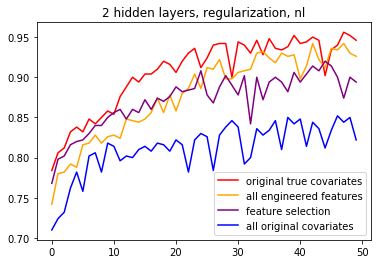

In [281]:
plt.title('2 hidden layers, regularization, nl')
#plt.plot(trace_nl1.history['val_acc'],label='true features', color="green")
plt.plot(trace_nl2.history['val_acc'],label='original true covariates', color="red")
plt.plot(trace_nl3.history['val_acc'],label='all engineered features', color="orange")
plt.plot(trace_nl4.history['val_acc'],label='feature selection', color="purple")
plt.plot(trace_nl5.history['val_acc'],label='all original covariates', color="blue")
plt.legend(loc=4)
plt.show()

For complex, non-linear models, feature engineering as well as removing irrelevant covariates can greatly improve neural network performance. The best performance was seen using original true covariates (no feature engineering, but removing irrelevant covariates). This was closely followed by using feature selection and using all engineered features, suggesting that when the true underlying relevant covariates are difficult to discern, feature engineering may be helpful. Surprisingly, including only the true features (that were then used in a non-linear model) resulted in worse performance, potentially because the neural network found it difficult to construct the non-linear underlying relationships.  

Compared to a linear model, the neural network was actually able to achieve higher overall validation accuracy with a nonlinear model.

In [258]:
###########################################################################################################################
### narrow models, 1 layer
###########################################################################################################################
## original true covariates
model_nl_narrow1 = Sequential()
model_nl_narrow1.add(Dense(20, input_dim=7, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_nl_narrow1.add(Dense(1, activation='sigmoid'))
model_nl_narrow1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_nl_narrow1 = model_nl_narrow1.fit(x_nonlinear_true[0:2500,0:7], y_nonlinear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_nonlinear_true[2500:3000,0:7], y_nonlinear[2500:3000]))
score_nl_narrow1 = model_nl_narrow1.evaluate(x_nonlinear_true[2500:3000,0:7], y_nonlinear[2500:3000], batch_size=64)

## all original covariates: 0:7,15:20
model_nl_narrow5 = Sequential()
model_nl_narrow5.add(Dense(20, input_dim=12, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_nl_narrow5.add(Dense(1, activation='sigmoid'))
model_nl_narrow5.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_nl_narrow5 = model_nl_narrow5.fit(np.concatenate((x_nonlinear_true[0:2500,0:7],x_nonlinear_true[0:2500,15:20]), axis=1), y_nonlinear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(np.concatenate((x_nonlinear_true[2500:3000,0:7],x_nonlinear_true[2500:3000,15:20]), axis=1), y_nonlinear[2500:3000]))
score_nl_narrow5 = model_nl_narrow5.evaluate(np.concatenate((x_nonlinear_true[2500:3000,0:7],x_nonlinear_true[2500:3000,15:20]), axis=1), y_nonlinear[2500:3000], batch_size=64)

## true features used to create nonl_narrowinear relationships
model_nl_narrow2 = Sequential()
model_nl_narrow2.add(Dense(20, input_dim=np.shape(x_nonlinear_true)[1], kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_nl_narrow2.add(Dense(1, activation='sigmoid'))
model_nl_narrow2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_nl_narrow2 = model_nl_narrow2.fit(x_nonlinear_true[0:2500,:], y_nonlinear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_nonlinear_true[2500:3000,:], y_nonlinear[2500:3000]))
score_nl_narrow2 = model_nl_narrow2.evaluate(x_nonlinear_true[2500:3000,:], y_nonlinear[2500:3000], batch_size=64)

## all extra features
model_nl_narrow3 = Sequential()
model_nl_narrow3.add(Dense(20, input_dim=np.shape(x_nonlinear_extra)[1], kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_nl_narrow3.add(Dense(1, activation='sigmoid'))
model_nl_narrow3.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_nl_narrow3 = model_nl_narrow3.fit(x_nonlinear_extra[0:2500,:], y_nonlinear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_nonlinear_extra[2500:3000,:], y_nonlinear[2500:3000]))
score_nl_narrow3 = model_nl_narrow3.evaluate(x_nonlinear_extra[2500:3000,:], y_nonlinear[2500:3000], batch_size=64)

## selected features
model_nl_narrow4 = Sequential()
model_nl_narrow4.add(Dense(20, input_dim=len(selected_features_nl), kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_nl_narrow4.add(Dense(1, activation='sigmoid'))
model_nl_narrow4.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_nl_narrow4 = model_nl_narrow4.fit(x_nonlinear_extra[0:2500,selected_features_nl], y_nonlinear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_nonlinear_extra[2500:3000,selected_features_nl], y_nonlinear[2500:3000]))
score_nl_narrow4 = model_nl_narrow4.evaluate(x_nonlinear_extra[2500:3000,selected_features_nl], y_nonlinear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.8971 - acc: 0.5672 - gini_normalized: nan - val_loss: 0.8554 - val_acc: 0.6300 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 60us/step - loss: 0.8253 - acc: 0.6572 - gini_normalized: nan - val_loss: 0.8012 - val_acc: 0.6560 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 67us/step - loss: 0.7749 - acc: 0.6924 - gini_normalized: nan - val_loss: 0.7582 - val_acc: 0.6980 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 65us/step - loss: 0.7351 - acc: 0.7120 - gini_normalized: nan - val_loss: 0.7228 - val_acc: 0.7080 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 62us/step - loss: 0.7000 - acc: 0.7248 - gini_normalized: nan - val_loss: 0.6915 - val_acc: 0.7120 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=======

Epoch 45/50
2500/2500 [==============================] - 0s 73us/step - loss: 0.4850 - acc: 0.8108 - gini_normalized: nan - val_loss: 0.4992 - val_acc: 0.7840 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 70us/step - loss: 0.4837 - acc: 0.8124 - gini_normalized: nan - val_loss: 0.4985 - val_acc: 0.7840 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 81us/step - loss: 0.4828 - acc: 0.8116 - gini_normalized: nan - val_loss: 0.4969 - val_acc: 0.7900 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 96us/step - loss: 0.4813 - acc: 0.8124 - gini_normalized: nan - val_loss: 0.4968 - val_acc: 0.7840 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 59us/step - loss: 0.4806 - acc: 0.8112 - gini_normalized: nan - val_loss: 0.4969 - val_acc: 0.7900 - val_gini_normalized: nan
Epoch 50/50
500/500 [==============================] - 0s 38us/step
Tr

2500/2500 [==============================] - 0s 64us/step - loss: 0.4963 - acc: 0.8048 - gini_normalized: nan - val_loss: 0.5122 - val_acc: 0.7920 - val_gini_normalized: nan
Epoch 39/50
2500/2500 [==============================] - 0s 57us/step - loss: 0.4948 - acc: 0.8032 - gini_normalized: nan - val_loss: 0.5083 - val_acc: 0.7960 - val_gini_normalized: nan
Epoch 40/50
2500/2500 [==============================] - 0s 51us/step - loss: 0.4927 - acc: 0.8044 - gini_normalized: nan - val_loss: 0.5080 - val_acc: 0.7860 - val_gini_normalized: nan
Epoch 41/50
2500/2500 [==============================] - 0s 67us/step - loss: 0.4915 - acc: 0.8056 - gini_normalized: nan - val_loss: 0.5067 - val_acc: 0.7880 - val_gini_normalized: nan
Epoch 42/50
2500/2500 [==============================] - 0s 63us/step - loss: 0.4899 - acc: 0.8032 - gini_normalized: nan - val_loss: 0.5069 - val_acc: 0.7980 - val_gini_normalized: nan
Epoch 43/50
2500/2500 [==============================] - 0s 62us/step - loss: 0.48

2500/2500 [==============================] - 0s 60us/step - loss: 0.4453 - acc: 0.8680 - gini_normalized: nan - val_loss: 0.4745 - val_acc: 0.8620 - val_gini_normalized: nan
Epoch 32/50
2500/2500 [==============================] - 0s 61us/step - loss: 0.4444 - acc: 0.8708 - gini_normalized: nan - val_loss: 0.4643 - val_acc: 0.8580 - val_gini_normalized: nan
Epoch 33/50
2500/2500 [==============================] - 0s 62us/step - loss: 0.4406 - acc: 0.8724 - gini_normalized: nan - val_loss: 0.4701 - val_acc: 0.8560 - val_gini_normalized: nan
Epoch 34/50
2500/2500 [==============================] - 0s 76us/step - loss: 0.4373 - acc: 0.8764 - gini_normalized: nan - val_loss: 0.4532 - val_acc: 0.8620 - val_gini_normalized: nan
Epoch 35/50
2500/2500 [==============================] - 0s 72us/step - loss: 0.4314 - acc: 0.8756 - gini_normalized: nan - val_loss: 0.4588 - val_acc: 0.8620 - val_gini_normalized: nan
Epoch 36/50
2500/2500 [==============================] - 0s 61us/step - loss: 0.43

2500/2500 [==============================] - 0s 60us/step - loss: 0.4636 - acc: 0.8504 - gini_normalized: nan - val_loss: 0.5268 - val_acc: 0.8380 - val_gini_normalized: nan
Epoch 25/50
2500/2500 [==============================] - 0s 62us/step - loss: 0.4628 - acc: 0.8524 - gini_normalized: nan - val_loss: 0.5302 - val_acc: 0.8400 - val_gini_normalized: nan
Epoch 26/50
2500/2500 [==============================] - 0s 63us/step - loss: 0.4546 - acc: 0.8508 - gini_normalized: nan - val_loss: 0.5281 - val_acc: 0.8260 - val_gini_normalized: nan
Epoch 27/50
2500/2500 [==============================] - 0s 69us/step - loss: 0.4517 - acc: 0.8532 - gini_normalized: nan - val_loss: 0.5224 - val_acc: 0.8400 - val_gini_normalized: nan
Epoch 28/50
2500/2500 [==============================] - 0s 68us/step - loss: 0.4471 - acc: 0.8588 - gini_normalized: nan - val_loss: 0.5097 - val_acc: 0.8380 - val_gini_normalized: nan
Epoch 29/50
2500/2500 [==============================] - 0s 60us/step - loss: 0.44

2500/2500 [==============================] - 0s 57us/step - loss: 0.5759 - acc: 0.8248 - gini_normalized: nan - val_loss: 0.6119 - val_acc: 0.8000 - val_gini_normalized: nan
Epoch 18/50
2500/2500 [==============================] - 0s 63us/step - loss: 0.5634 - acc: 0.8332 - gini_normalized: nan - val_loss: 0.6025 - val_acc: 0.7980 - val_gini_normalized: nan
Epoch 19/50
2500/2500 [==============================] - 0s 59us/step - loss: 0.5563 - acc: 0.8336 - gini_normalized: nan - val_loss: 0.5965 - val_acc: 0.8200 - val_gini_normalized: nan
Epoch 20/50
2500/2500 [==============================] - 0s 60us/step - loss: 0.5481 - acc: 0.8336 - gini_normalized: nan - val_loss: 0.5806 - val_acc: 0.8080 - val_gini_normalized: nan
Epoch 21/50
2500/2500 [==============================] - 0s 59us/step - loss: 0.5409 - acc: 0.8348 - gini_normalized: nan - val_loss: 0.5731 - val_acc: 0.8180 - val_gini_normalized: nan
Epoch 22/50
2500/2500 [==============================] - 0s 60us/step - loss: 0.53

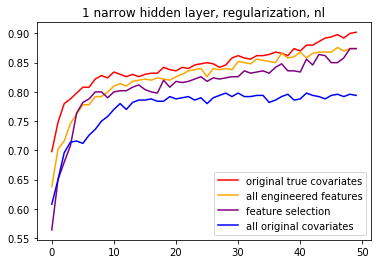

In [282]:
plt.title('1 narrow hidden layer, regularization, nl')
#plt.plot(trace_nl_narrow1.history['val_acc'],label='true features', color="green")
plt.plot(trace_nl_narrow2.history['val_acc'],label='original true covariates', color="red")
plt.plot(trace_nl_narrow3.history['val_acc'],label='all engineered features', color="orange")
plt.plot(trace_nl_narrow4.history['val_acc'],label='feature selection', color="purple")
plt.plot(trace_nl_narrow5.history['val_acc'],label='all original covariates', color="blue")
plt.legend(loc=4)
plt.show()

In [264]:
###########################################################################################################################
### Wide models, 1 layer
###########################################################################################################################
## original true covariates
model_nl_wide1 = Sequential()
model_nl_wide1.add(Dense(100, input_dim=7, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_nl_wide1.add(Dense(1, activation='sigmoid'))
model_nl_wide1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_nl_wide1 = model_nl_wide1.fit(x_nonlinear_true[0:2500,0:7], y_nonlinear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_nonlinear_true[2500:3000,0:7], y_nonlinear[2500:3000]))
score_nl_wide1 = model_nl_wide1.evaluate(x_nonlinear_true[2500:3000,0:7], y_nonlinear[2500:3000], batch_size=64)

## all original covariates: 0:7,15:20
model_nl_wide5 = Sequential()
model_nl_wide5.add(Dense(100, input_dim=12, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_nl_wide5.add(Dense(1, activation='sigmoid'))
model_nl_wide5.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_nl_wide5 = model_nl_wide5.fit(np.concatenate((x_nonlinear_true[0:2500,0:7],x_nonlinear_true[0:2500,15:20]), axis=1), y_nonlinear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(np.concatenate((x_nonlinear_true[2500:3000,0:7],x_nonlinear_true[2500:3000,15:20]), axis=1), y_nonlinear[2500:3000]))
score_nl_wide5 = model_nl_wide5.evaluate(np.concatenate((x_nonlinear_true[2500:3000,0:7],x_nonlinear_true[2500:3000,15:20]), axis=1), y_nonlinear[2500:3000], batch_size=64)

## true features used to create nonl_wideinear relationships
model_nl_wide2 = Sequential()
model_nl_wide2.add(Dense(100, input_dim=np.shape(x_nonlinear_true)[1], kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_nl_wide2.add(Dense(1, activation='sigmoid'))
model_nl_wide2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_nl_wide2 = model_nl_wide2.fit(x_nonlinear_true[0:2500,:], y_nonlinear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_nonlinear_true[2500:3000,:], y_nonlinear[2500:3000]))
score_nl_wide2 = model_nl_wide2.evaluate(x_nonlinear_true[2500:3000,:], y_nonlinear[2500:3000], batch_size=64)

## all extra features
model_nl_wide3 = Sequential()
model_nl_wide3.add(Dense(100, input_dim=np.shape(x_nonlinear_extra)[1], kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_nl_wide3.add(Dense(1, activation='sigmoid'))
model_nl_wide3.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_nl_wide3 = model_nl_wide3.fit(x_nonlinear_extra[0:2500,:], y_nonlinear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_nonlinear_extra[2500:3000,:], y_nonlinear[2500:3000]))
score_nl_wide3 = model_nl_wide3.evaluate(x_nonlinear_extra[2500:3000,:], y_nonlinear[2500:3000], batch_size=64)

## selected features
model_nl_wide4 = Sequential()
model_nl_wide4.add(Dense(100, input_dim=len(selected_features_nl), kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_nl_wide4.add(Dense(1, activation='sigmoid'))
model_nl_wide4.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_nl_wide4 = model_nl_wide4.fit(x_nonlinear_extra[0:2500,selected_features_nl], y_nonlinear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_nonlinear_extra[2500:3000,selected_features_nl], y_nonlinear[2500:3000]))
score_nl_wide4 = model_nl_wide4.evaluate(x_nonlinear_extra[2500:3000,selected_features_nl], y_nonlinear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.8553 - acc: 0.6924 - gini_normalized: nan - val_loss: 0.7969 - val_acc: 0.7160 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 69us/step - loss: 0.7506 - acc: 0.7448 - gini_normalized: nan - val_loss: 0.7190 - val_acc: 0.7340 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 83us/step - loss: 0.6838 - acc: 0.7560 - gini_normalized: nan - val_loss: 0.6656 - val_acc: 0.7500 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 87us/step - loss: 0.6374 - acc: 0.7676 - gini_normalized: nan - val_loss: 0.6269 - val_acc: 0.7480 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 67us/step - loss: 0.6071 - acc: 0.7668 - gini_normalized: nan - val_loss: 0.6036 - val_acc: 0.7640 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=======

Epoch 45/50
2500/2500 [==============================] - 0s 62us/step - loss: 0.4528 - acc: 0.8228 - gini_normalized: nan - val_loss: 0.4762 - val_acc: 0.7940 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 64us/step - loss: 0.4507 - acc: 0.8192 - gini_normalized: nan - val_loss: 0.4689 - val_acc: 0.7840 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 61us/step - loss: 0.4494 - acc: 0.8184 - gini_normalized: nan - val_loss: 0.4683 - val_acc: 0.7960 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 63us/step - loss: 0.4496 - acc: 0.8204 - gini_normalized: nan - val_loss: 0.4686 - val_acc: 0.7920 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 60us/step - loss: 0.4478 - acc: 0.8212 - gini_normalized: nan - val_loss: 0.4654 - val_acc: 0.7920 - val_gini_normalized: nan
Epoch 50/50
500/500 [==============================] - 0s 42us/step
Tr

2500/2500 [==============================] - 0s 66us/step - loss: 0.4626 - acc: 0.8132 - gini_normalized: nan - val_loss: 0.4900 - val_acc: 0.7960 - val_gini_normalized: nan
Epoch 39/50
2500/2500 [==============================] - 0s 78us/step - loss: 0.4616 - acc: 0.8140 - gini_normalized: nan - val_loss: 0.4858 - val_acc: 0.7860 - val_gini_normalized: nan
Epoch 40/50
2500/2500 [==============================] - 0s 68us/step - loss: 0.4602 - acc: 0.8132 - gini_normalized: nan - val_loss: 0.4868 - val_acc: 0.7840 - val_gini_normalized: nan
Epoch 41/50
2500/2500 [==============================] - 0s 70us/step - loss: 0.4589 - acc: 0.8156 - gini_normalized: nan - val_loss: 0.4893 - val_acc: 0.7920 - val_gini_normalized: nan
Epoch 42/50
2500/2500 [==============================] - 0s 65us/step - loss: 0.4574 - acc: 0.8152 - gini_normalized: nan - val_loss: 0.4858 - val_acc: 0.8000 - val_gini_normalized: nan
Epoch 43/50
2500/2500 [==============================] - 0s 64us/step - loss: 0.45

2500/2500 [==============================] - 0s 64us/step - loss: 0.3391 - acc: 0.9080 - gini_normalized: nan - val_loss: 0.3718 - val_acc: 0.9260 - val_gini_normalized: nan
Epoch 32/50
2500/2500 [==============================] - 0s 66us/step - loss: 0.3349 - acc: 0.9072 - gini_normalized: nan - val_loss: 0.3368 - val_acc: 0.9280 - val_gini_normalized: nan
Epoch 33/50
2500/2500 [==============================] - 0s 64us/step - loss: 0.3425 - acc: 0.9072 - gini_normalized: nan - val_loss: 0.3629 - val_acc: 0.9140 - val_gini_normalized: nan
Epoch 34/50
2500/2500 [==============================] - 0s 67us/step - loss: 0.3314 - acc: 0.9108 - gini_normalized: nan - val_loss: 0.3253 - val_acc: 0.9300 - val_gini_normalized: nan
Epoch 35/50
2500/2500 [==============================] - 0s 64us/step - loss: 0.3305 - acc: 0.9124 - gini_normalized: nan - val_loss: 0.3337 - val_acc: 0.9240 - val_gini_normalized: nan
Epoch 36/50
2500/2500 [==============================] - 0s 65us/step - loss: 0.33

2500/2500 [==============================] - 0s 66us/step - loss: 0.4546 - acc: 0.8588 - gini_normalized: nan - val_loss: 0.5197 - val_acc: 0.8160 - val_gini_normalized: nan
Epoch 25/50
2500/2500 [==============================] - 0s 72us/step - loss: 0.4546 - acc: 0.8640 - gini_normalized: nan - val_loss: 0.4994 - val_acc: 0.8480 - val_gini_normalized: nan
Epoch 26/50
2500/2500 [==============================] - 0s 70us/step - loss: 0.4595 - acc: 0.8604 - gini_normalized: nan - val_loss: 0.4877 - val_acc: 0.8560 - val_gini_normalized: nan
Epoch 27/50
2500/2500 [==============================] - 0s 66us/step - loss: 0.4448 - acc: 0.8684 - gini_normalized: nan - val_loss: 0.4819 - val_acc: 0.8640 - val_gini_normalized: nan
Epoch 28/50
2500/2500 [==============================] - 0s 76us/step - loss: 0.4376 - acc: 0.8704 - gini_normalized: nan - val_loss: 0.4754 - val_acc: 0.8600 - val_gini_normalized: nan
Epoch 29/50
2500/2500 [==============================] - 0s 76us/step - loss: 0.43

2500/2500 [==============================] - 0s 68us/step - loss: 0.5149 - acc: 0.8472 - gini_normalized: nan - val_loss: 0.5378 - val_acc: 0.8440 - val_gini_normalized: nan
Epoch 18/50
2500/2500 [==============================] - 0s 74us/step - loss: 0.4972 - acc: 0.8492 - gini_normalized: nan - val_loss: 0.5223 - val_acc: 0.8380 - val_gini_normalized: nan
Epoch 19/50
2500/2500 [==============================] - 0s 76us/step - loss: 0.5065 - acc: 0.8540 - gini_normalized: nan - val_loss: 0.4972 - val_acc: 0.8580 - val_gini_normalized: nan
Epoch 20/50
2500/2500 [==============================] - 0s 72us/step - loss: 0.4779 - acc: 0.8576 - gini_normalized: nan - val_loss: 0.5158 - val_acc: 0.8520 - val_gini_normalized: nan
Epoch 21/50
2500/2500 [==============================] - 0s 66us/step - loss: 0.4887 - acc: 0.8552 - gini_normalized: nan - val_loss: 0.5105 - val_acc: 0.8420 - val_gini_normalized: nan
Epoch 22/50
2500/2500 [==============================] - 0s 70us/step - loss: 0.48

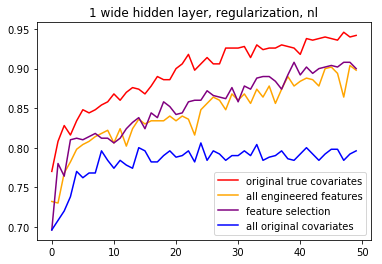

In [283]:
plt.title('1 wide hidden layer, regularization, nl')
#plt.plot(trace_nl_wide1.history['val_acc'],label='true features', color="green")
plt.plot(trace_nl_wide2.history['val_acc'],label='original true covariates', color="red")
plt.plot(trace_nl_wide3.history['val_acc'],label='all engineered features', color="orange")
plt.plot(trace_nl_wide4.history['val_acc'],label='feature selection', color="purple")
plt.plot(trace_nl_wide5.history['val_acc'],label='all original covariates', color="blue")
plt.legend(loc=4)
plt.show()

The differences are particularly notable for a single wide hidden layer.